# WeatherPy

## Imports

In [31]:
from citipy import citipy
from scipy import stats
import numpy as np
import pandas as pd
import json 
import requests
import matplotlib.pyplot as plt
from api_keys import weather_api_key
from api_keys import g_key

# cahnge temp to amx temp

## Generate Cities List

In [2]:
#First want to create my list of 500 lat/lng pairs
# it says AT LEAST 500 so how many?????
# assuming best way is to obtain from a dataframe like we did in examples
# Lat and Long: in decimal degrees format and range from -90 to 90 for latitude and -180 to 180 for longitude.
# so for randomness will need to go through whole range of lats and whole range of longs
# also need to make sure they are unique pairs.
# could I make massive list and remove duplicates?? or is there a unique random function

# don't want integers for lat/long b/c need decimals
# numpy.random.uniform(low=0.0, high=1.0, size=None) seems best
# everything else only goes b/w 0 and 1 for numpy.random and other random features
# also seems you could use  import random   random.uniform(a, b)
# round(random.uniform(1,2), N) to ensure decimals

# also, how many decimal places do lat/long need. I saw somehting that said 15
# I wonder if there is a requirement for the google thingo and if I can round

from numpy.random import seed


# this sets it so that everytime I run seed(1) and then the random thingo it will give the same random numbers
# just to help me get a handle on what's happening
# works for both
seed(1)

lat_number = np.random.uniform(-90, 90, 1300)

long_number = np.random.uniform(-180, 180, 1300)

#print(lat_number)
#print(long_number)

In [3]:
# make my data frame out of these lists

number_df = pd.DataFrame({"Latitude":lat_number, "Longitude": long_number})
number_df.head()

,Latitude,Longitude
0,-14.936039,13.322562
1,39.658409,-48.245995
2,-89.979413,37.550464
3,-35.580137,165.168906
4,-63.583940,-38.583740


In [4]:
#DON'T NEED
# dropping any duplicate for a subset of the two columns to ensure unique values
#number_df = number_df.drop_duplicates(subset=['Latitude', 'Longitude'])
#number_df

In [5]:
# this also check is dupicate rows but there aren't any
#duplicate_rows = number_df[number_df.duplicated(['Latitude', 'Longitude'])]
#duplicate_rows

In [6]:
#Now to use citipy
# will need to loop through the lats and longs find a city for each, and then put these cities into a list

# setting enmpty city list
cities = []

# citipy finds country code as well
# do I want that???
# are there cities with the same name across the world or??
# I'll put it in for now and then see
country = []


# itterating through each row using the index
for x in number_df.index:
    lat = number_df['Latitude'][x]
    long = number_df['Longitude'][x]
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    
    cities.append(city_name)
    country.append(country_code)
    
# do I then just add them to my dataframe??

number_df["City"] = cities
number_df["Country"] = country
number_df

#>>> city = citipy.nearest_city(22.99, 120.21)
#>>> city
#<citipy.City instance at 0x1069b6518>
#>>>
#>>> city.city_name     # Tainan, my home town
#'tainan'
#>>>
#>>> city.country_code
#'tw'                  # And the country is surely Taiwan


#Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
#The city data you generate is based on random coordinates as well as different query times; as such, 
#your outputs will not be an exact match to the provided starter notebook.

# what is a query time?
# i think it is time taken for requested info to return
# so I don't think it is something I need to worry about 

,Latitude,Longitude,City,Country
0,-14.936039,13.322562,lubango,ao
1,39.658409,-48.245995,torbay,ca
2,-89.979413,37.550464,port elizabeth,za
3,-35.580137,165.168906,ahipara,nz
4,-63.583940,-38.583740,ushuaia,ar
...,...,...,...,...
1295,56.959632,1.215939,boddam,gb
1296,-2.929149,9.777663,gamba,ga
1297,16.191234,-76.291348,morant bay,jm
1298,51.707421,4.319723,steenbergen,nl


In [7]:
# should I actually just check if any city names are the same??? becuase that is what I'm searching for right
# and if any are the same then same answer???

duplicate_rows = number_df[number_df.duplicated(subset = ['City'])]
duplicate_rows

# this is better because now I'm finding the places with duplicate city names, because obvs multiple different lats/lng
# can give the same city
# so don't need above part removing lat/lng dupliates just this bit probs
# actually the bit below this is just me checking

,Latitude,Longitude,City,Country
5,-73.379053,-38.529721,ushuaia,ar
18,-64.730351,88.796690,busselton,au
27,-82.970139,-94.901724,punta arenas,cl
28,-59.430524,57.815408,taolanaro,mg
30,-72.297570,-104.122461,punta arenas,cl
...,...,...,...,...
1290,86.866162,85.610656,dikson,ru
1291,74.473132,-81.852379,qaanaaq,gl
1292,-27.473504,-6.665108,jamestown,sh
1296,-2.929149,9.777663,gamba,ga


In [8]:
# dropping dupicate cities

number_df = number_df.drop_duplicates(subset=['City'])
number_df

# default sets as keep = first I think

# end up with 572 rows!!

# I think I should redo the index so that the numbers aren't gappy now that I've deleted the duplicates

,Latitude,Longitude,City,Country
0,-14.936039,13.322562,lubango,ao
1,39.658409,-48.245995,torbay,ca
2,-89.979413,37.550464,port elizabeth,za
3,-35.580137,165.168906,ahipara,nz
4,-63.583940,-38.583740,ushuaia,ar
...,...,...,...,...
1293,50.440424,-110.868744,medicine hat,ca
1294,8.361826,124.960650,maluko,ph
1295,56.959632,1.215939,boddam,gb
1297,16.191234,-76.291348,morant bay,jm


In [9]:
# Now need to do API calls in a loop, but a series of api calls becuase think can only do 10 at once or something
# in the example they created the new rows on the dataframe first so that within the loop they just add data to it.
# following example NearestRestr
# need Temperature, Humidity, Cloudiness, Wind Speed (mph)
# df in starter code also has date but I don't know what this is

cities_df = number_df.copy()

cities_df['Temperature'] = ""
cities_df['Humidity'] = ""
cities_df['Cloudiness'] = ""
cities_df['Wind Speed (mph)'] = ""
cities_df['Date'] = ""

cities_df.head()


,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed (mph),Date
0,-14.936039,13.322562,lubango,ao,,,,,
1,39.658409,-48.245995,torbay,ca,,,,,
2,-89.979413,37.550464,port elizabeth,za,,,,,
3,-35.580137,165.168906,ahipara,nz,,,,,
4,-63.583940,-38.583740,ushuaia,ar,,,,,


In [10]:
#doing json thing to see what it is like
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#above is base url

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city = 'melbourne'

response = requests.get(query_url + city).json()

print(json.dumps(response, indent = 4, sort_keys = True))

print (response["dt"])

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 28.0836,
        "lon": -80.6081
    },
    "dt": 1610366106,
    "id": 4163971,
    "main": {
        "feels_like": 12.34,
        "humidity": 100,
        "pressure": 1023,
        "temp": 12.61,
        "temp_max": 15,
        "temp_min": 11.11
    },
    "name": "Melbourne",
    "sys": {
        "country": "US",
        "id": 4922,
        "sunrise": 1610367315,
        "sunset": 1610405116,
        "type": 1
    },
    "timezone": -18000,
    "visibility": 9656,
    "weather": [
        {
            "description": "mist",
            "icon": "50n",
            "id": 701,
            "main": "Mist"
        }
    ],
    "wind": {
        "deg": 300,
        "speed": 1.54
    }
}
1610366106


In [12]:
# setting up loop

# how do I do this in sets
# example seems to go in sets of 50 

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#above is base url

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


 # assemble url and make API request
print("Beginning Data Retrieval")
print("-------------------------")

# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # get city from df
    city = row['City']

    response = requests.get(query_url + city).json()

    # adding to data frame using try and except incase no data
    
    try:
        print(f"Retrieving Results for Index {index}: {city}.")
        
        # do I want temp_max?
        cities_df.loc[index, 'Temperature'] = response["main"]["temp"]
        cities_df.loc[index, 'Humidity'] = response["main"]["humidity"]
        cities_df.loc[index, 'Cloudiness'] = response["clouds"]["all"]
        cities_df.loc[index, 'Wind Speed (mph)'] = response["wind"]["speed"]
        cities_df.loc[index, 'Date'] = response["dt"]
       
        
    except (KeyError, IndexError):
        print("City not found... skipping.")
        
    print("------------")
    
    
    
    

#will use something like this for looping and printing

# find the closest restaurant of each type to coordinates

#base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
#params = {
    #"location": "39.952583,-75.16522",  # philadelphia coords,
    #"rankby": "distance",
    #"type": "restaurant",
    #"key": gkey,
#}
# use iterrows to iterate through pandas dataframe
#for index, row in types_df.iterrows():

    # get restaurant type from df
    #restr_type = row['ethnicity']

    # add keyword to params dict
    #params['keyword'] = restr_type
    # adding new parameter in the loop becuase it is changing and will be the ethnicity we are up to

    # assemble url and make API request
    #print(f"Retrieving Results for Index {index}: {restr_type}.")
    #response = requests.get(base_url, params=params).json()
    
    # extract results
    #results = response['results']
    
    #try:
        #print(f"Closest {restr_type} restaurant is {results[0]['name']}.")
        
        #types_df.loc[index, 'name'] = results[0]['name']
        #types_df.loc[index, 'address'] = results[0]['vicinity']
        #types_df.loc[index, 'price_level'] = results[0]['price_level']
        #types_df.loc[index, 'rating'] = results[0]['rating']
        
    #except (KeyError, IndexError):
        #print("Missing field/result... skipping.")
        
    #print("------------")



Beginning Data Retrieval
-------------------------
Retrieving Results for Index 0: lubango.
------------
Retrieving Results for Index 1: torbay.
------------
Retrieving Results for Index 2: port elizabeth.
------------
Retrieving Results for Index 3: ahipara.
------------
Retrieving Results for Index 4: ushuaia.
------------
Retrieving Results for Index 6: busselton.
------------
Retrieving Results for Index 7: taolanaro.
City not found... skipping.
------------
Retrieving Results for Index 8: caravelas.
------------
Retrieving Results for Index 9: kulhudhuffushi.
------------
Retrieving Results for Index 10: conde.
------------
Retrieving Results for Index 11: half moon bay.
------------
Retrieving Results for Index 12: arraial do cabo.
------------
Retrieving Results for Index 13: upernavik.
------------
Retrieving Results for Index 14: punta arenas.
------------
Retrieving Results for Index 15: hasaki.
------------
Retrieving Results for Index 16: quatre cocos.
------------
Retrievi

Retrieving Results for Index 193: cardston.
------------
Retrieving Results for Index 194: cherskiy.
------------
Retrieving Results for Index 195: klaksvik.
------------
Retrieving Results for Index 198: taoudenni.
------------
Retrieving Results for Index 201: bosaso.
------------
Retrieving Results for Index 203: los llanos de aridane.
------------
Retrieving Results for Index 204: avarua.
------------
Retrieving Results for Index 205: axim.
------------
Retrieving Results for Index 206: atar.
------------
Retrieving Results for Index 207: phan rang.
City not found... skipping.
------------
Retrieving Results for Index 209: tasiilaq.
------------
Retrieving Results for Index 210: hualmay.
------------
Retrieving Results for Index 212: kaitangata.
------------
Retrieving Results for Index 215: puerto ayora.
------------
Retrieving Results for Index 218: tigil.
------------
Retrieving Results for Index 221: byron bay.
------------
Retrieving Results for Index 223: grindavik.
---------

Retrieving Results for Index 457: alofi.
------------
Retrieving Results for Index 464: hjorring.
------------
Retrieving Results for Index 467: ancud.
------------
Retrieving Results for Index 476: baherden.
------------
Retrieving Results for Index 477: ilulissat.
------------
Retrieving Results for Index 479: san-pedro.
------------
Retrieving Results for Index 480: sawtell.
------------
Retrieving Results for Index 481: borogontsy.
------------
Retrieving Results for Index 482: mandiana.
------------
Retrieving Results for Index 484: galiwinku.
City not found... skipping.
------------
Retrieving Results for Index 488: bathsheba.
------------
Retrieving Results for Index 489: mittagong.
------------
Retrieving Results for Index 490: manuk mangkaw.
------------
Retrieving Results for Index 491: longyearbyen.
------------
Retrieving Results for Index 492: jabiru.
City not found... skipping.
------------
Retrieving Results for Index 496: barentsburg.
City not found... skipping.
-------

Retrieving Results for Index 798: yaguachi.
------------
Retrieving Results for Index 800: bolungarvik.
City not found... skipping.
------------
Retrieving Results for Index 802: giddalur.
------------
Retrieving Results for Index 806: batemans bay.
------------
Retrieving Results for Index 807: chiang klang.
------------
Retrieving Results for Index 809: rio gallegos.
------------
Retrieving Results for Index 813: coquimbo.
------------
Retrieving Results for Index 814: klichka.
------------
Retrieving Results for Index 818: montijo.
------------
Retrieving Results for Index 819: yanan.
City not found... skipping.
------------
Retrieving Results for Index 820: ribeira grande.
------------
Retrieving Results for Index 822: semnan.
------------
Retrieving Results for Index 824: lima.
------------
Retrieving Results for Index 828: banswara.
------------
Retrieving Results for Index 829: cumra.
------------
Retrieving Results for Index 830: zhuhai.
------------
Retrieving Results for Inde

Retrieving Results for Index 1205: montepuez.
------------
Retrieving Results for Index 1210: amapa.
------------
Retrieving Results for Index 1213: horqueta.
------------
Retrieving Results for Index 1221: sokoni.
------------
Retrieving Results for Index 1223: armstrong.
------------
Retrieving Results for Index 1229: saint anthony.
------------
Retrieving Results for Index 1236: belaya gora.
------------
Retrieving Results for Index 1245: nagato.
------------
Retrieving Results for Index 1249: aranos.
------------
Retrieving Results for Index 1250: westport.
------------
Retrieving Results for Index 1256: namibe.
------------
Retrieving Results for Index 1261: whitehorse.
------------
Retrieving Results for Index 1262: dulovo.
------------
Retrieving Results for Index 1263: ixtapa.
------------
Retrieving Results for Index 1267: laguna.
------------
Retrieving Results for Index 1271: ketchikan.
------------
Retrieving Results for Index 1272: trelew.
------------
Retrieving Results f

In [13]:
# want to export to csv

#cities_df.to_csv("city_weather_data.csv", encoding="utf-8", index=False)


cities_df

,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed (mph),Date
0,-14.936039,13.322562,lubango,ao,24,43,20,3.09,1610366219
1,39.658409,-48.245995,torbay,ca,-1.53,93,90,6.69,1610366219
2,-89.979413,37.550464,port elizabeth,za,22,73,90,7.2,1610366219
3,-35.580137,165.168906,ahipara,nz,15.95,83,36,2.55,1610366220
4,-63.583940,-38.583740,ushuaia,ar,6,65,75,8.75,1610366144
...,...,...,...,...,...,...,...,...,...
1293,50.440424,-110.868744,medicine hat,ca,-0.15,74,1,4.63,1610366359
1294,8.361826,124.960650,maluko,ph,25,90,99,2.68,1610366359
1295,56.959632,1.215939,boddam,gb,4.23,93,75,3.09,1610366360
1297,16.191234,-76.291348,morant bay,jm,25.01,73,75,3.6,1610366360


In [14]:
cities_df.describe()
# for some reaosn this is only doing it for lat and long column

,Latitude,Longitude
count,572.000000,572.000000
mean,19.401821,14.207347
std,36.958569,92.807436
min,-89.979413,-179.628144
25%,-7.507964,-61.192644
50%,20.605475,15.855764
75%,49.287249,89.004057
max,89.518113,179.467383


In [15]:
cities_df.dtypes

# because objects.

Latitude            float64
Longitude           float64
City                 object
Country              object
Temperature          object
Humidity             object
Cloudiness           object
Wind Speed (mph)     object
Date                 object
dtype: object

In [18]:
# convert all columns of DataFrame
#cities_df = cities_df.apply(pd.to_numeric) # convert all columns of DataFrame

cities_df[['Temperature', 'Humidity', 'Cloudiness', 'Wind Speed (mph)', 'Date' ]] = cities_df[['Temperature', 'Humidity', 'Cloudiness', 'Wind Speed (mph)', 'Date']].apply(pd.to_numeric)

# convert just columns "a" and "b"
#df[["a", "b"]] = df[["a", "b"]].apply(pd.to_numeric)
cities_df.dtypes

Latitude            float64
Longitude           float64
City                 object
Country              object
Temperature         float64
Humidity            float64
Cloudiness          float64
Wind Speed (mph)    float64
Date                float64
dtype: object

In [19]:
cities_df.describe()

,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed (mph),Date
count,572.000000,572.000000,520.000000,520.000000,520.000000,520.000000,5.200000e+02
mean,19.401821,14.207347,10.096750,73.286538,54.792308,3.869308,1.610366e+09
std,36.958569,92.807436,18.204983,20.150986,38.209482,2.633417,7.941296e+01
min,-89.979413,-179.628144,-41.190000,6.000000,0.000000,0.100000,1.610366e+09
25%,-7.507964,-61.192644,-2.292500,65.000000,17.000000,1.840000,1.610366e+09
50%,20.605475,15.855764,15.225000,79.000000,70.000000,3.195000,1.610366e+09
75%,49.287249,89.004057,25.672500,88.000000,90.000000,5.557500,1.610366e+09
max,89.518113,179.467383,39.270000,100.000000,100.000000,14.910000,1.610366e+09


In [20]:
# Checking if any humidity outliers by seeing if they are greater than the max

over100 = cities_df.loc[(cities_df["Humidity"] > 100)]
over100

,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed (mph),Date


In [50]:
# There are none so it is okay to go to the plots with citities_df
# but dropping nan issues

cities_df = cities_df.dropna()

cities_df

# now 520 rows

,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed (mph),Date
0,-14.936039,13.322562,lubango,ao,24.00,43.0,20.0,3.09,1.610366e+09
1,39.658409,-48.245995,torbay,ca,-1.53,93.0,90.0,6.69,1.610366e+09
2,-89.979413,37.550464,port elizabeth,za,22.00,73.0,90.0,7.20,1.610366e+09
3,-35.580137,165.168906,ahipara,nz,15.95,83.0,36.0,2.55,1.610366e+09
4,-63.583940,-38.583740,ushuaia,ar,6.00,65.0,75.0,8.75,1.610366e+09
...,...,...,...,...,...,...,...,...,...
1293,50.440424,-110.868744,medicine hat,ca,-0.15,74.0,1.0,4.63,1.610366e+09
1294,8.361826,124.960650,maluko,ph,25.00,90.0,99.0,2.68,1.610366e+09
1295,56.959632,1.215939,boddam,gb,4.23,93.0,75.0,3.09,1.610366e+09
1297,16.191234,-76.291348,morant bay,jm,25.01,73.0,75.0,3.60,1.610366e+09


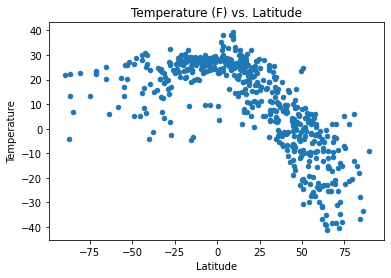

In [51]:
# Temperature (F) vs. Latitude
graph1 = cities_df.plot(kind = "scatter", x = "Latitude", y = "Temperature", title = "Temperature (F) vs. Latitude")
graph1


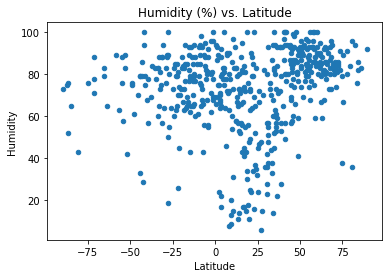

In [52]:
# Humidity (%) vs. Latitude
graph2 = cities_df.plot(kind = "scatter", x = "Latitude", y = "Humidity", title = "Humidity (%) vs. Latitude")
graph2

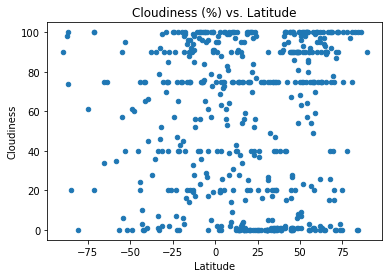

In [53]:
# Cloudiness (%) vs. Latitude
graph3 = cities_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", title = "Cloudiness (%) vs. Latitude")
graph3

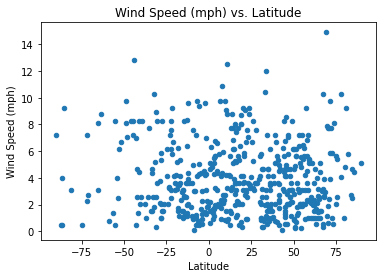

In [54]:
# Wind Speed (mph) vs. Latitude
graph4 = cities_df.plot(kind = "scatter", x = "Latitude", y = "Wind Speed (mph)", title = "Wind Speed (mph) vs. Latitude")
graph4

In [55]:
# separating into hemispheres
#Northern Hemisphere (greater than or equal to 0 degrees latitude)  
#Southern Hemisphere (less than 0 degrees latitude)

northern_df = cities_df.loc[(cities_df["Latitude"] >= 0)]
northern_df


,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed (mph),Date
1,39.658409,-48.245995,torbay,ca,-1.53,93.0,90.0,6.69,1.610366e+09
9,6.987012,68.023817,kulhudhuffushi,mv,27.54,72.0,83.0,1.71,1.610366e+09
11,33.339510,-130.999264,half moon bay,us,7.69,87.0,20.0,1.97,1.610366e+09
13,68.061139,-59.609019,upernavik,gl,-9.38,88.0,100.0,3.95,1.610366e+09
15,30.684152,153.278929,hasaki,jp,-3.36,80.0,20.0,1.03,1.610366e+09
...,...,...,...,...,...,...,...,...,...
1293,50.440424,-110.868744,medicine hat,ca,-0.15,74.0,1.0,4.63,1.610366e+09
1294,8.361826,124.960650,maluko,ph,25.00,90.0,99.0,2.68,1.610366e+09
1295,56.959632,1.215939,boddam,gb,4.23,93.0,75.0,3.09,1.610366e+09
1297,16.191234,-76.291348,morant bay,jm,25.01,73.0,75.0,3.60,1.610366e+09


In [56]:
southern_df = cities_df.loc[(cities_df["Latitude"] < 0)]
southern_df

,Latitude,Longitude,City,Country,Temperature,Humidity,Cloudiness,Wind Speed (mph),Date
0,-14.936039,13.322562,lubango,ao,24.00,43.0,20.0,3.09,1.610366e+09
2,-89.979413,37.550464,port elizabeth,za,22.00,73.0,90.0,7.20,1.610366e+09
3,-35.580137,165.168906,ahipara,nz,15.95,83.0,36.0,2.55,1.610366e+09
4,-63.583940,-38.583740,ushuaia,ar,6.00,65.0,75.0,8.75,1.610366e+09
6,-56.473162,104.629318,busselton,au,20.68,63.0,0.0,1.34,1.610366e+09
...,...,...,...,...,...,...,...,...,...
1249,-24.572037,19.837595,aranos,na,22.67,73.0,100.0,4.16,1.610366e+09
1250,-40.391442,169.467123,westport,nz,-4.18,68.0,1.0,2.06,1.610366e+09
1256,-21.012578,4.788126,namibe,ao,30.00,45.0,40.0,6.69,1.610366e+09
1267,-31.037500,-44.619453,laguna,br,4.42,88.0,99.0,0.32,1.610366e+09


The r squared value is: -0.84.


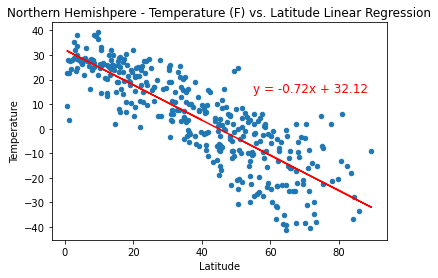

In [61]:
# Temperature (F) vs. Latitude
# Northern Hemisphere
graph1_north = northern_df.plot(kind = "scatter", x = "Latitude", y = "Temperature", 
                                title = "Northern Hemishpere - Temperature (F) vs. Latitude Linear Regression")


# Perform a linear regression on temperature vs. latitude
# Calculating Regression line
x_value = northern_df["Latitude"]
y_value = northern_df["Temperature"]

# so if i type stats.linregress I dont need to import it. importing stats is enough
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
#plt.scatter(x_value, y_value)

# Label plot and annotate the line equation
#plt.xlabel("Latitude")
#plt.ylabel("Temperature")
#plt.title("Temperature vs. Latitude")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(55,15), fontsize=12,color="red")


# Print r square value
print(f"The r squared value is: {round(rvalue, 4)}.")

# Show plot
plt.show()



The r squared value is: 0.3781.


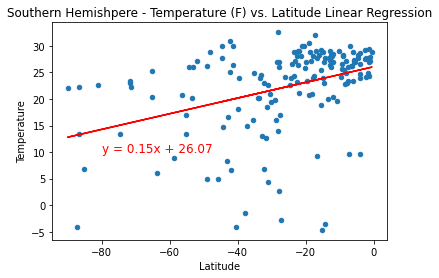

In [63]:
# Temperature (F) vs. Latitude
# SOUthern Hemisphere
graph1_south = southern_df.plot(kind = "scatter", x = "Latitude", y = "Temperature", 
                                title = "Southern Hemishpere - Temperature (F) vs. Latitude Linear Regression")


# Perform a linear regression on temperature vs. latitude
# Calculating Regression line
x_value = southern_df["Latitude"]
y_value = southern_df["Temperature"]

# so if i type stats.linregress I dont need to import it. importing stats is enough
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
#plt.scatter(x_value, y_value)

# Label plot and annotate the line equation
#plt.xlabel("Latitude")
#plt.ylabel("Temperature")
#plt.title("Temperature vs. Latitude")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(-80,10), fontsize=12,color="red")


# Print r square value
print(f"The r squared value is: {round(rvalue, 4)}.")

# Show plot
plt.show()


The r squared value is: 0.4034.


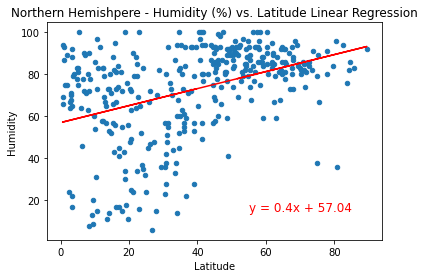

In [65]:
# Humidity (%) vs. Latitude
# Northern Hemisphere
graph2_north = northern_df.plot(kind = "scatter", x = "Latitude", y = "Humidity", 
                                title = "Northern Hemishpere - Humidity (%) vs. Latitude Linear Regression")


# Perform a linear regression on temperature vs. latitude
# Calculating Regression line
x_value = northern_df["Latitude"]
y_value = northern_df["Humidity"]

# so if i type stats.linregress I dont need to import it. importing stats is enough
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
#plt.scatter(x_value, y_value)

# Label plot and annotate the line equation
#plt.xlabel("Latitude")
#plt.ylabel("Temperature")
#plt.title("Temperature vs. Latitude")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(55,15), fontsize=12,color="red")


# Print r square value
print(f"The r squared value is: {round(rvalue, 4)}.")

# Show plot
plt.show()



The r squared value is: 0.1424.


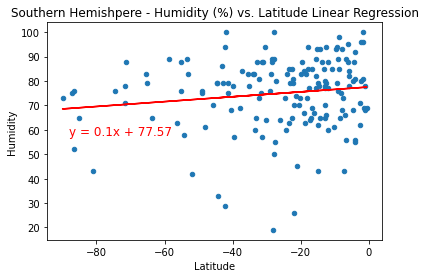

In [73]:
# Humidity (%) vs. Latitude
# SOUthern Hemisphere
graph2_south = southern_df.plot(kind = "scatter", x = "Latitude", y = "Humidity", 
                                title = "Southern Hemishpere - Humidity (%) vs. Latitude Linear Regression")


# Perform a linear regression on temperature vs. latitude
# Calculating Regression line
x_value = southern_df["Latitude"]
y_value = southern_df["Humidity"]

# so if i type stats.linregress I dont need to import it. importing stats is enough
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
#plt.scatter(x_value, y_value)

# Label plot and annotate the line equation
#plt.xlabel("Latitude")
#plt.ylabel("Temperature")
#plt.title("Temperature vs. Latitude")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(-88,58), fontsize=12,color="red")


# Print r square value
print(f"The r squared value is: {round(rvalue, 4)}.")

# Show plot
plt.show()

The r squared value is: 0.1504.


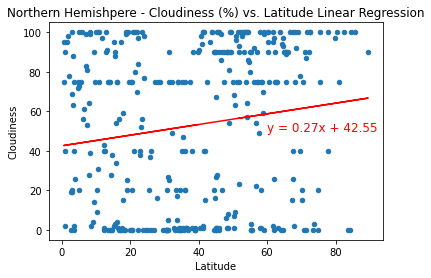

In [76]:
# Cloudiness (%) vs. Latitude
# Northern Hemisphere
graph3_north = northern_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", 
                                title = "Northern Hemishpere - Cloudiness (%) vs. Latitude Linear Regression")


# Perform a linear regression on temperature vs. latitude
# Calculating Regression line
x_value = northern_df["Latitude"]
y_value = northern_df["Cloudiness"]

# so if i type stats.linregress I dont need to import it. importing stats is enough
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
#plt.scatter(x_value, y_value)

# Label plot and annotate the line equation
#plt.xlabel("Latitude")
#plt.ylabel("Temperature")
#plt.title("Temperature vs. Latitude")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(60,50), fontsize=12,color="red")

# Print r square value
print(f"The r squared value is: {round(rvalue, 4)}.")

# Show plot
plt.show()



The r squared value is: 0.1604.


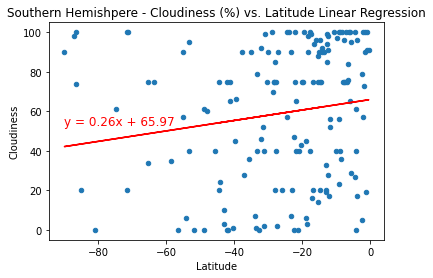

In [85]:
# Cloudiness (%) vs. Latitude
# Southern Hemisphere
graph3_south = southern_df.plot(kind = "scatter", x = "Latitude", y = "Cloudiness", 
                                title = "Southern Hemishpere - Cloudiness (%) vs. Latitude Linear Regression")


# Perform a linear regression on temperature vs. latitude
# Calculating Regression line
x_value = southern_df["Latitude"]
y_value = southern_df["Cloudiness"]

# so if i type stats.linregress I dont need to import it. importing stats is enough
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
#plt.scatter(x_value, y_value)

# Label plot and annotate the line equation
#plt.xlabel("Latitude")
#plt.ylabel("Temperature")
#plt.title("Temperature vs. Latitude")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(-90,53), fontsize=12,color="red")


# Print r square value
print(f"The r squared value is: {round(rvalue, 4)}.")

# Show plot
plt.show()

The r squared value is: -0.0374.


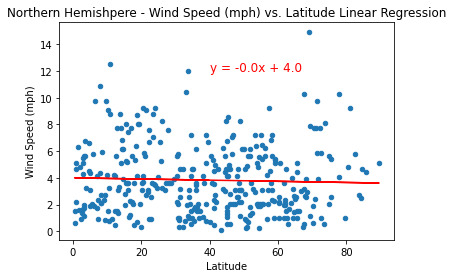

In [87]:
# Wind Speed (mph) vs. Latitude
# Northern Hemisphere
graph4_north = northern_df.plot(kind = "scatter", x = "Latitude", y = "Wind Speed (mph)", 
                                title = "Northern Hemishpere - Wind Speed (mph) vs. Latitude Linear Regression")


# Perform a linear regression on temperature vs. latitude
# Calculating Regression line
x_value = northern_df["Latitude"]
y_value = northern_df["Wind Speed (mph)"]

# so if i type stats.linregress I dont need to import it. importing stats is enough
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
#plt.scatter(x_value, y_value)

# Label plot and annotate the line equation
#plt.xlabel("Latitude")
#plt.ylabel("Temperature")
#plt.title("Temperature vs. Latitude")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(40,12), fontsize=12,color="red")

# Print r square value
print(f"The r squared value is: {round(rvalue, 4)}.")

# Show plot
plt.show()

The r squared value is: -0.1702.


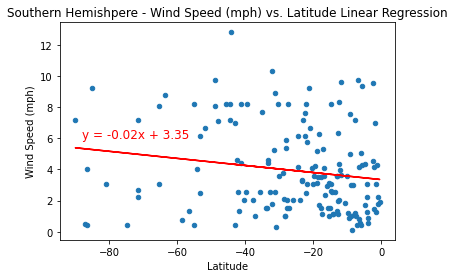

In [91]:
# Wind Speed (mph) vs. Latitude
# Southern Hemisphere
graph4_south = southern_df.plot(kind = "scatter", x = "Latitude", y = "Wind Speed (mph)", 
                                title = "Southern Hemishpere - Wind Speed (mph) vs. Latitude Linear Regression")


# Perform a linear regression on temperature vs. latitude
# Calculating Regression line
x_value = southern_df["Latitude"]
y_value = southern_df["Wind Speed (mph)"]

# so if i type stats.linregress I dont need to import it. importing stats is enough
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_value, y_value)

# Get regression values
regress_values = x_value * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create Plot
#plt.scatter(x_value, y_value)

# Label plot and annotate the line equation
#plt.xlabel("Latitude")
#plt.ylabel("Temperature")
#plt.title("Temperature vs. Latitude")
plt.plot(x_value, regress_values, "r-")
plt.annotate(line_eq,(-88,6), fontsize=12,color="red")


# Print r square value
print(f"The r squared value is: {round(rvalue, 4)}.")

# Show plot
plt.show()